# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | itarema
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | vaitape
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | yulara
Processing Record 11 of Set 1 | segovia
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | tinaquillo
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | amderm

Processing Record 33 of Set 4 | havre-saint-pierre
Processing Record 34 of Set 4 | coari
Processing Record 35 of Set 4 | creel
Processing Record 36 of Set 4 | raga
Processing Record 37 of Set 4 | mount gambier
Processing Record 38 of Set 4 | kyzyl-suu
Processing Record 39 of Set 4 | mattru
Processing Record 40 of Set 4 | sovetskiy
Processing Record 41 of Set 4 | luau
Processing Record 42 of Set 4 | port blair
Processing Record 43 of Set 4 | chernyshevskiy
Processing Record 44 of Set 4 | ipilan
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | manado
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | acarau
Processing Record 0 of Set 5 | lubango
Processing Record 1 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 5 | gubkinskiy
Processing Record 3 of Set 5 | vung tau
Processing Record 4 of Set 5 | quatre cocos
Processing Record 5 of Set 

Processing Record 25 of Set 8 | zhaocheng
City not found. Skipping...
Processing Record 26 of Set 8 | kahului
Processing Record 27 of Set 8 | saint-philippe
Processing Record 28 of Set 8 | lake charles
Processing Record 29 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 8 | berlevag
Processing Record 31 of Set 8 | holme
Processing Record 32 of Set 8 | praia
Processing Record 33 of Set 8 | conceicao do mato dentro
Processing Record 34 of Set 8 | zhezkazgan
Processing Record 35 of Set 8 | pacatuba
Processing Record 36 of Set 8 | ixtapa
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | impruneta
Processing Record 39 of Set 8 | manaure
Processing Record 40 of Set 8 | dodge city
Processing Record 41 of Set 8 | shimoda
Processing Record 42 of Set 8 | tonantins
Processing Record 43 of Set 8 | garowe
Processing Record 44 of Set 8 | esperance
Processing Record 45 of Set 8 | kem
Processing Record 46 of Set 8 | uwayl
City not found. Skipping

Processing Record 13 of Set 12 | suna
Processing Record 14 of Set 12 | alice
Processing Record 15 of Set 12 | labuhan
Processing Record 16 of Set 12 | santa cruz de tenerife
Processing Record 17 of Set 12 | xingyi
Processing Record 18 of Set 12 | cap malheureux
Processing Record 19 of Set 12 | itaituba
Processing Record 20 of Set 12 | boditi
Processing Record 21 of Set 12 | kysyl-syr
Processing Record 22 of Set 12 | pervoye maya
Processing Record 23 of Set 12 | russell
Processing Record 24 of Set 12 | mogwase
Processing Record 25 of Set 12 | balabac
Processing Record 26 of Set 12 | yenagoa
Processing Record 27 of Set 12 | gravdal
Processing Record 28 of Set 12 | tagusao
Processing Record 29 of Set 12 | celestun
Processing Record 30 of Set 12 | dunedin
Processing Record 31 of Set 12 | miles city
Processing Record 32 of Set 12 | inirida
Processing Record 33 of Set 12 | pajarito
Processing Record 34 of Set 12 | port keats
Processing Record 35 of Set 12 | atar
Processing Record 36 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,299.57,90,27,4.02,EC,1675733141
1,albany,42.6001,-73.9662,271.84,68,62,0.89,US,1675732938
2,longyearbyen,78.2186,15.6401,271.06,80,100,16.46,SJ,1675733141
3,los llanos de aridane,28.6585,-17.9182,287.01,78,75,3.58,ES,1675733142
4,port elizabeth,-33.9180,25.5701,295.55,93,40,6.17,ZA,1675733142


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,299.57,90,27,4.02,EC,1675733141
1,albany,42.6001,-73.9662,271.84,68,62,0.89,US,1675732938
2,longyearbyen,78.2186,15.6401,271.06,80,100,16.46,SJ,1675733141
3,los llanos de aridane,28.6585,-17.9182,287.01,78,75,3.58,ES,1675733142
4,port elizabeth,-33.9180,25.5701,295.55,93,40,6.17,ZA,1675733142


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

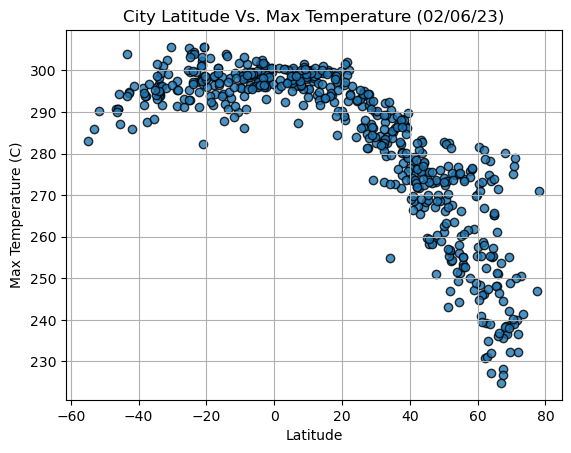

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

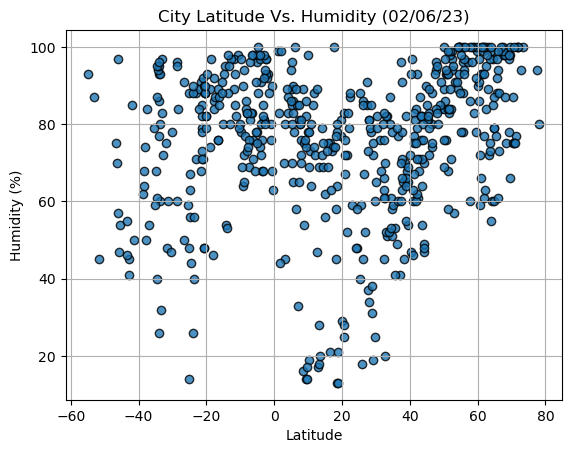

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

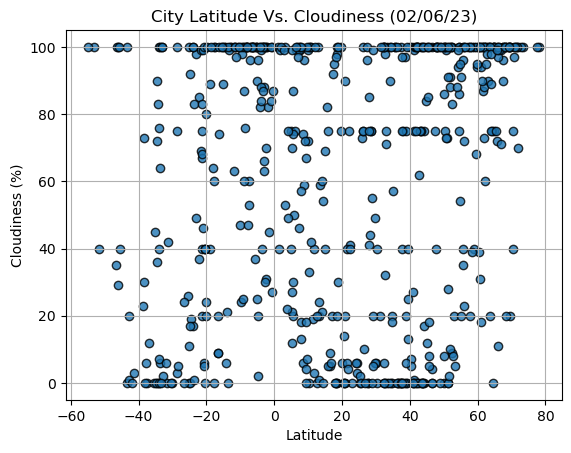

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

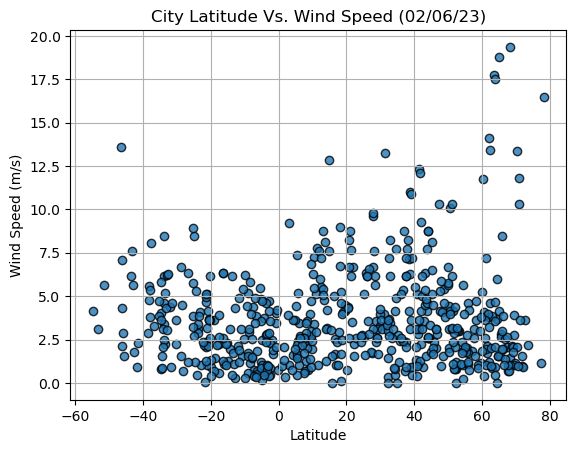

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values, y_label, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, color="r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,271.84,68,62,0.89,US,1675732938
2,longyearbyen,78.2186,15.6401,271.06,80,100,16.46,SJ,1675733141
3,los llanos de aridane,28.6585,-17.9182,287.01,78,75,3.58,ES,1675733142
10,segovia,41.1667,-4.0000,275.06,77,1,2.84,ES,1675733144
11,jamestown,42.0970,-79.2353,272.05,93,100,2.24,US,1675733118


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,299.57,90,27,4.02,EC,1675733141
4,port elizabeth,-33.9180,25.5701,295.55,93,40,6.17,ZA,1675733142
5,itarema,-2.9248,-39.9167,298.85,81,88,4.12,BR,1675733122
6,lebu,-37.6167,-73.6500,287.53,84,0,8.06,CL,1675733143
7,vaitape,-16.5167,-151.7500,300.51,76,9,6.31,PF,1675733143


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.869314806450131


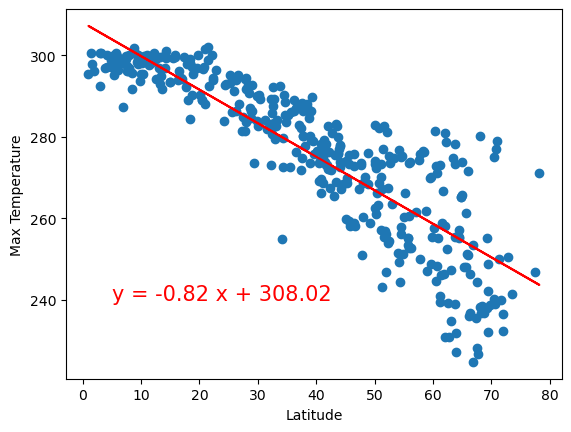

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (5,240))


The r-squared is: 0.3819410517224894


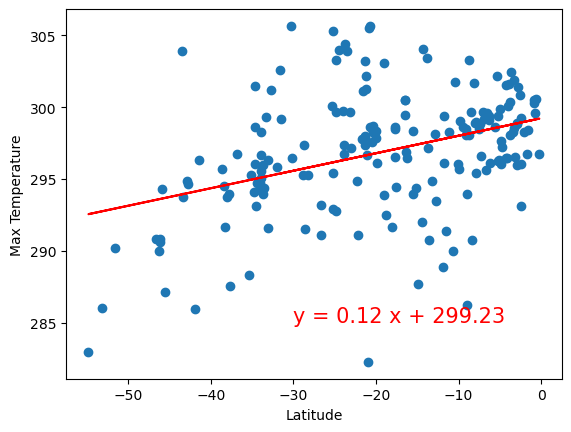

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (-30,285))


**Discussion about the linear relationship:** There is a strong negative correlation between latitude and maximum temperature on the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.41501133521444866


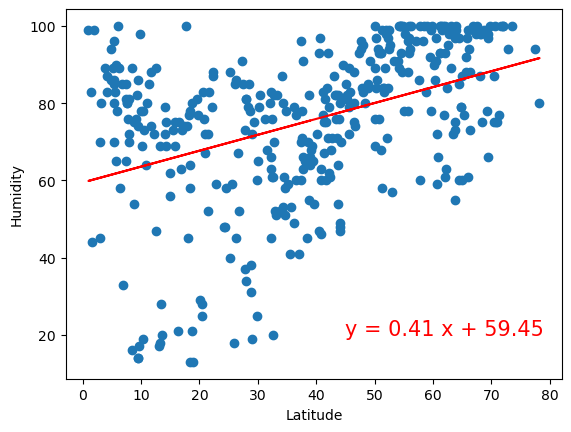

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (45,20))


The r-squared is: 0.3755378986609363


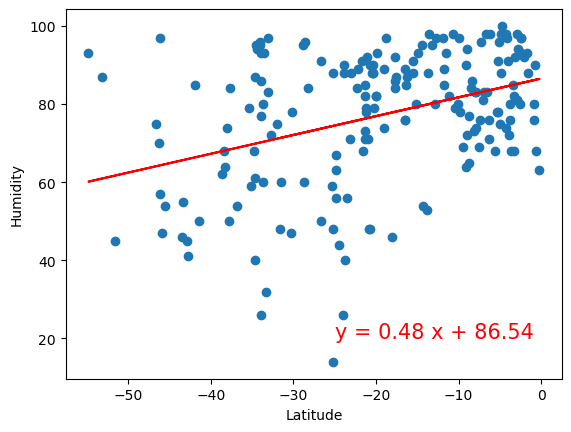

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2849739140789184


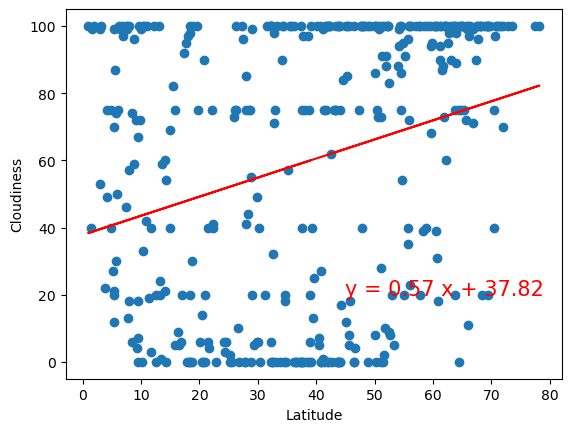

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (45,20))

The r-squared is: 0.3858112841400839


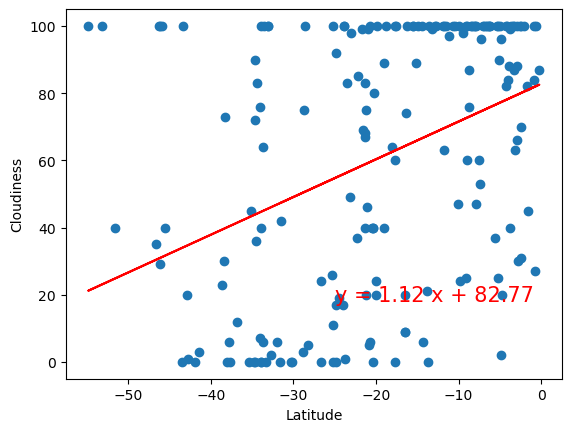

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-25,18))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03678972215492666


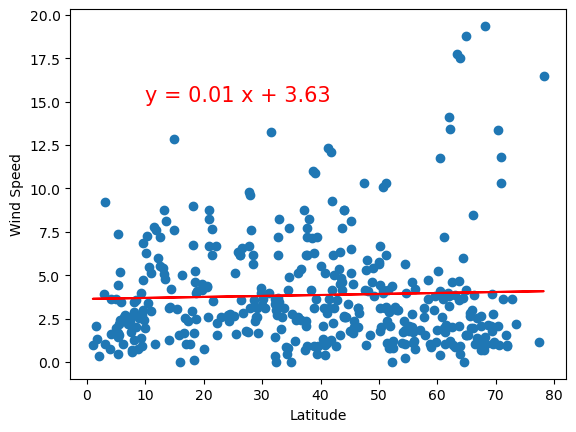

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (10,15))

The r-squared is: -0.36034021013030326


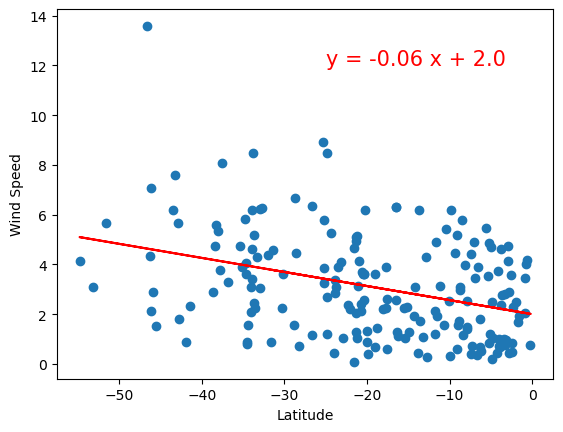

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-25,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE